In [11]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [12]:
# x values from csv file dataset column data
x = pd.read_csv('laptop_data_stats_numerical.csv')
# y = base data column for comparison
y = x['price']

# Dataset analysis using White Grid

In [13]:
# Call Whitegrid for overall data comparison chart
sns.set(style="whitegrid")

# Analysis of dataset columns describing numeric values with range values
x.describe()

,Id,primary_use,processor_brand,price,capacity,ram,touchscreen,size,resolution,weight
count,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000
mean,494.177914,33.711656,2.431493,761.817996,537.243354,10.388548,0.127812,14.843395,1215.289366,3.864898
std,282.985478,9.218528,0.895748,418.044107,276.013543,4.951800,0.334051,1.019679,532.036774,0.841714
min,0.000000,10.000000,1.000000,200.000000,128.000000,4.000000,0.000000,11.600000,720.000000,1.720000
25%,250.250000,30.000000,1.000000,470.000000,256.000000,8.000000,0.000000,14.000000,1080.000000,3.260000
50%,494.500000,40.000000,3.000000,675.000000,512.000000,8.000000,0.000000,15.600000,1080.000000,3.750000
75%,738.750000,40.000000,3.000000,920.000000,512.000000,16.000000,0.000000,15.600000,1080.000000,4.190000
max,983.000000,50.000000,3.000000,3200.000000,2000.000000,32.000000,1.000000,17.300000,3842.000000,6.830000


### Sales price distribution chart

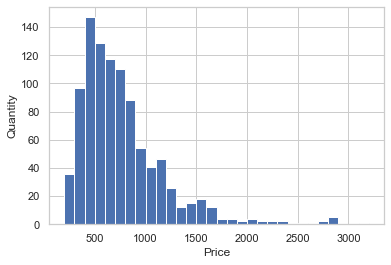

In [14]:
# Distribution of sales prices based on dataset price column
fig, price = plt.subplots(1, 1)
# see if I can add values to left and bottom of table
price.set_xlabel('Price')
price.set_ylabel('Quantity')
plt.hist(y, bins = 30);
#Done

## Heatmap of Laptop Specification Correlations

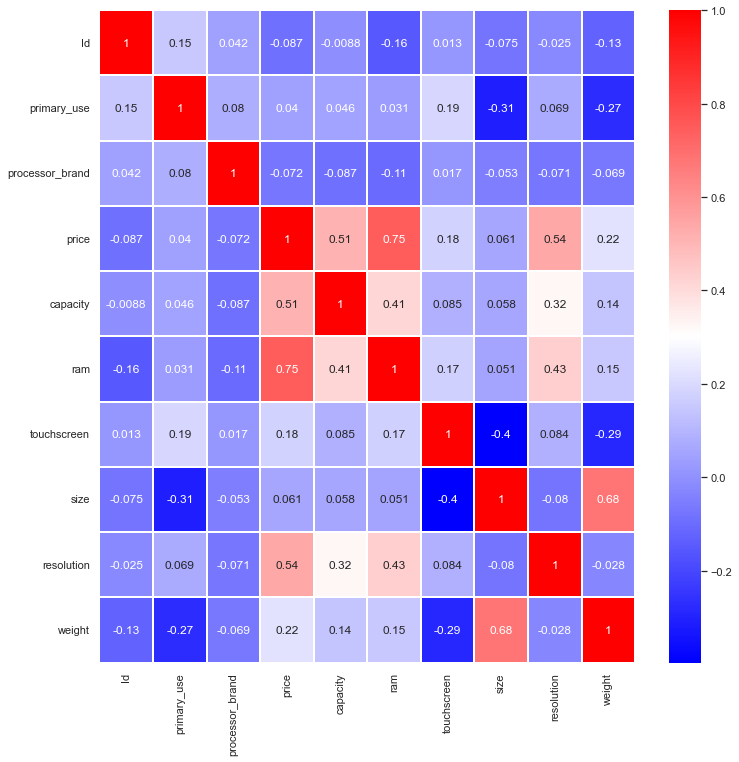

In [15]:
#Heat Map instantiation to find value for regressor selection
plt.figure(figsize = (12,12))
correlation_value = x.corr()
sns.heatmap(correlation_value, annot=True, cmap = "bwr", linewidths = 0.01);
#done

## 2 Dimensional plot maps to view the correlation between price and laptop specifications

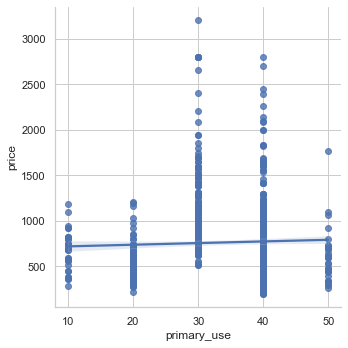

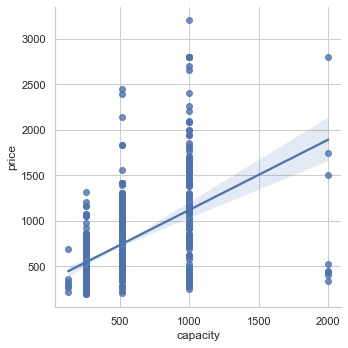

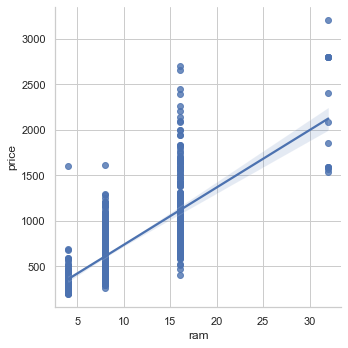

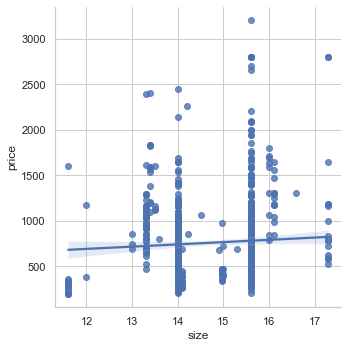

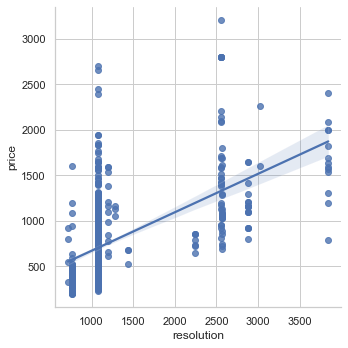

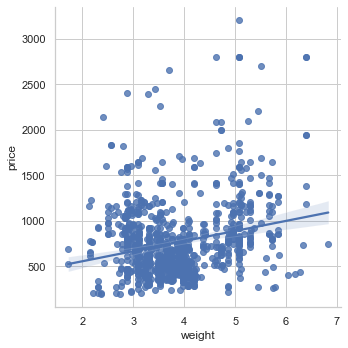

In [16]:
#Using values from the heatmap, we can include all values below 1. Id and touchscreen are insignificant values
laptop_specifications = []
correlation_values = correlation_value.index[correlation_value['price'] < 1]

for section in correlation_values:
    if(section != 'Id' and section != 'touchscreen' and section != 'processor_brand'):
        laptop_specifications.append(section)
    
#create plot relations between laptop_specifications and price
for section in laptop_specifications:
    sns.lmplot(x = section, y = 'price', data = x)

In [17]:
#relevant data from dataset for regression analysis
regressors = x[['size', 'capacity','processor_brand', 'ram', 'primary_use', 'weight', 'resolution']]

#values from x and y axis divided up for testing and training
y = x['price']
x_value_trainer, x_value_tester, y_value_train, y_value_test = train_test_split(regressors, y, test_size=.5, random_state=0)

# Random Forest data classification data
rf_regressor = RandomForestRegressor(n_estimators=1000, random_state=5)

#Use random forest to train classification data
rf_regressor.fit(x_value_trainer, y_value_train)

RandomForestRegressor(n_estimators=1000, random_state=5)

In [18]:
#Function to use all values supplied by the widgets as arguments to predict the laptop price  
def predict_laptop_price(size, capacity, processor, ram, primary_use, weight, resolution):
    predicted_price = rf_regressor.predict([[
        size.value, capacity.value, processor.value, ram.value, 
        primary_use.value, weight.value, resolution.value]])
    return predicted_price

#Function to print out predicton response to user
def predict_price(_):
    price_prediction = predict_laptop_price(size, capacity, processor, ram, primary_use, weight, resolution)
    with widget_output:
        widget_output.clear_output()
        print("")
        print("Based on your selected values,",'${:,.2f}'.format(price_prediction[0]), "is your predicted laptop price.")
        print("\nError Analysis Report")
        print("----------------------")
        print('Mean Absolute Error Value:', '{:,.2f}'.format(metrics.mean_absolute_error(y_value_test, y_value_train)))
    return

# Adjust any values on the sliders or drop down lists and click the 
# "Predict Price" Button

In [19]:
# Slider and Dropdown Widgets collect collect data from a user. These values are used in the predict_laptop_price function

#size value slider widget
size = widgets.FloatSlider(min=11.6, max=17.3, step=.1, value=11.6, description='Screen Size')
#weight value slider widget
weight = widgets.FloatSlider(value=1.72, min=1.72, max=6.83, step=.01, description='Weight')

#capacity value dropdown widget
capacity = widgets.Dropdown(
    options=[('128 GB', 128), ('256 GB', 256), ('512 GB', 512),('1 TB', 1000),('2 TB', 2000),],
    value=128, description='Capacity:')
#processor value dropdown widget
processor = widgets.Dropdown(
    options=[('AMD', 1), ('Intel', 2), ('Apple', 3)],
    value=1, description='Processor:')
#ram value dropdown widget
ram = widgets.Dropdown(
    options=[('4 GB', 4), ('8 GB', 8), ('16 GB', 16),('32 GB', 32)],
    value=4, description='RAM Size:')
#primary_use dropdown widget
primary_use = widgets.Dropdown(
    options=[('Entertainment', 10),('Everyday Use', 20),('Gaming', 30),
             ('Processing & Multitasking', 40),('Travel & Business', 50)],
    value=10, description='Primary Use:')
#resolution dropdown widget
resolution = widgets.Dropdown(
    options=[('1080x720', 720),('1366x768', 768),('1920x1080', 1080),('1920x1200', 1200),('1920x1280', 1280),
             ('2160x1440', 1440),('2240x1400', 2240),('2560x1440', 2560),('2560x1600', 2566),('3024x1964', 3024),
             ('3840x2160', 3841),('3840x2400', 3842)],
    value = 720,
    description='Screen Size:',
)
#Button Widget 
button_predict_price = widgets.Button(description='Predict Price')
widget_output = widgets.Output()

#Button function to call price prediction response
button_predict_price.on_click(predict_price)

# List of widgets for Laptop Specification Display Box
laptop_specifications = [widgets.VBox([size, weight, capacity, processor, 
                                       ram, primary_use,resolution,button_predict_price,widget_output])]

# Initialize Display Box with widgets
DisplayBox = widgets.Tab()
DisplayBox.children = laptop_specifications

# Value Selection Box title
DisplayBox.set_title(0, 'Laptop Specifications')
DisplayBox